# Mushroom Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Practice Projects\\mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [4]:
df.shape

(8124, 23)

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### There are no missing values

## Univariate Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

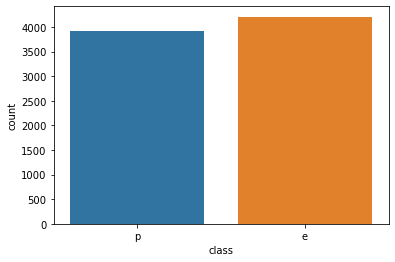

In [7]:
sns.countplot(df['class'])

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### There are almost equal number of e and p. So, there is no class imbalance.

### Since, all the columns are with labeled data, no need to check outliers and skewness. Hence not plotting dist plot and boxplots.

## Encoding the labeled data

In [9]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=df.columns
for i in col:
    df[i]=le.fit_transform(df[i])

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
x=df.drop('class',axis=1)
y=df['class']

## Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [13]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


## Choosing Random State Value

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 1.0 ran state= 1


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Model Selection

In [17]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
clas=classification_report(y_test,pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [18]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
clas=classification_report(y_test,pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [19]:
sup=SVC()
sup.fit(x_train,y_train)
pred=sup.predict(x_test)
clas=classification_report(y_test,pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## selecting n number

In [20]:
kmax=0
nn=0
for i in range(3,10,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>kmax:
        kmax=acc
        nn=i
print('accuracy=',kmax,'neigh=',nn)

accuracy= 1.0 neigh= 3


In [27]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train,y_train)
pred=knn1.predict(x_test)
clas=classification_report(y_test,pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,x,y,cv=5).mean())
print(cross_val_score(rfc,x,y,cv=5).mean())
print(cross_val_score(sup,x,y,cv=5).mean())
print(cross_val_score(knn1,x,y,cv=5).mean())

0.9207002652519893
0.899649943160288
0.8702213717317167
0.8817978021978021


### Decision tree is the best model since it has the least difference with accuracy

## Hyper Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],
           'splitter':['best', 'random'],
           'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':np.arange(2,16)}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [34]:
Final_mod=DecisionTreeClassifier(criterion='gini',max_depth=11,max_features='log2',splitter='best')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


## Saving the Model

In [35]:
import joblib
joblib.dump(Final_mod,'Final_model.pkl')

['Final_model.pkl']